# Importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [2]:
data=pd.read_excel('iris.xls')

In [3]:
data.head()

SL   SW   PL   PW Classification
0  5.1  3.5  1.4  0.2    Iris-setosa
1  4.9  3.0  1.4  0.2    Iris-setosa
2  NaN  3.2  1.3  0.2    Iris-setosa
3  4.6  3.1  1.5  0.2    Iris-setosa
4  5.0  3.6  1.4  0.2    Iris-setosa

# PDA

In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

SL          SW          PL          PW
count  143.000000  144.000000  144.000000  150.000000
mean     5.855944    3.049306    3.756250    1.198667
std      0.828168    0.430644    1.761306    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000

Dividing the data into numerical and categorical data

In [7]:
num_data=data.select_dtypes(include=['float64'])

In [8]:
cata_data=data.select_dtypes(include=['object'])


In [9]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

# Managing missing values

In [10]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

we have missing values in SL,SW and PL.Inorder to replace the missing value first we try to find out whether the data is normal or skewed.

CHECKING THE NORMALITY

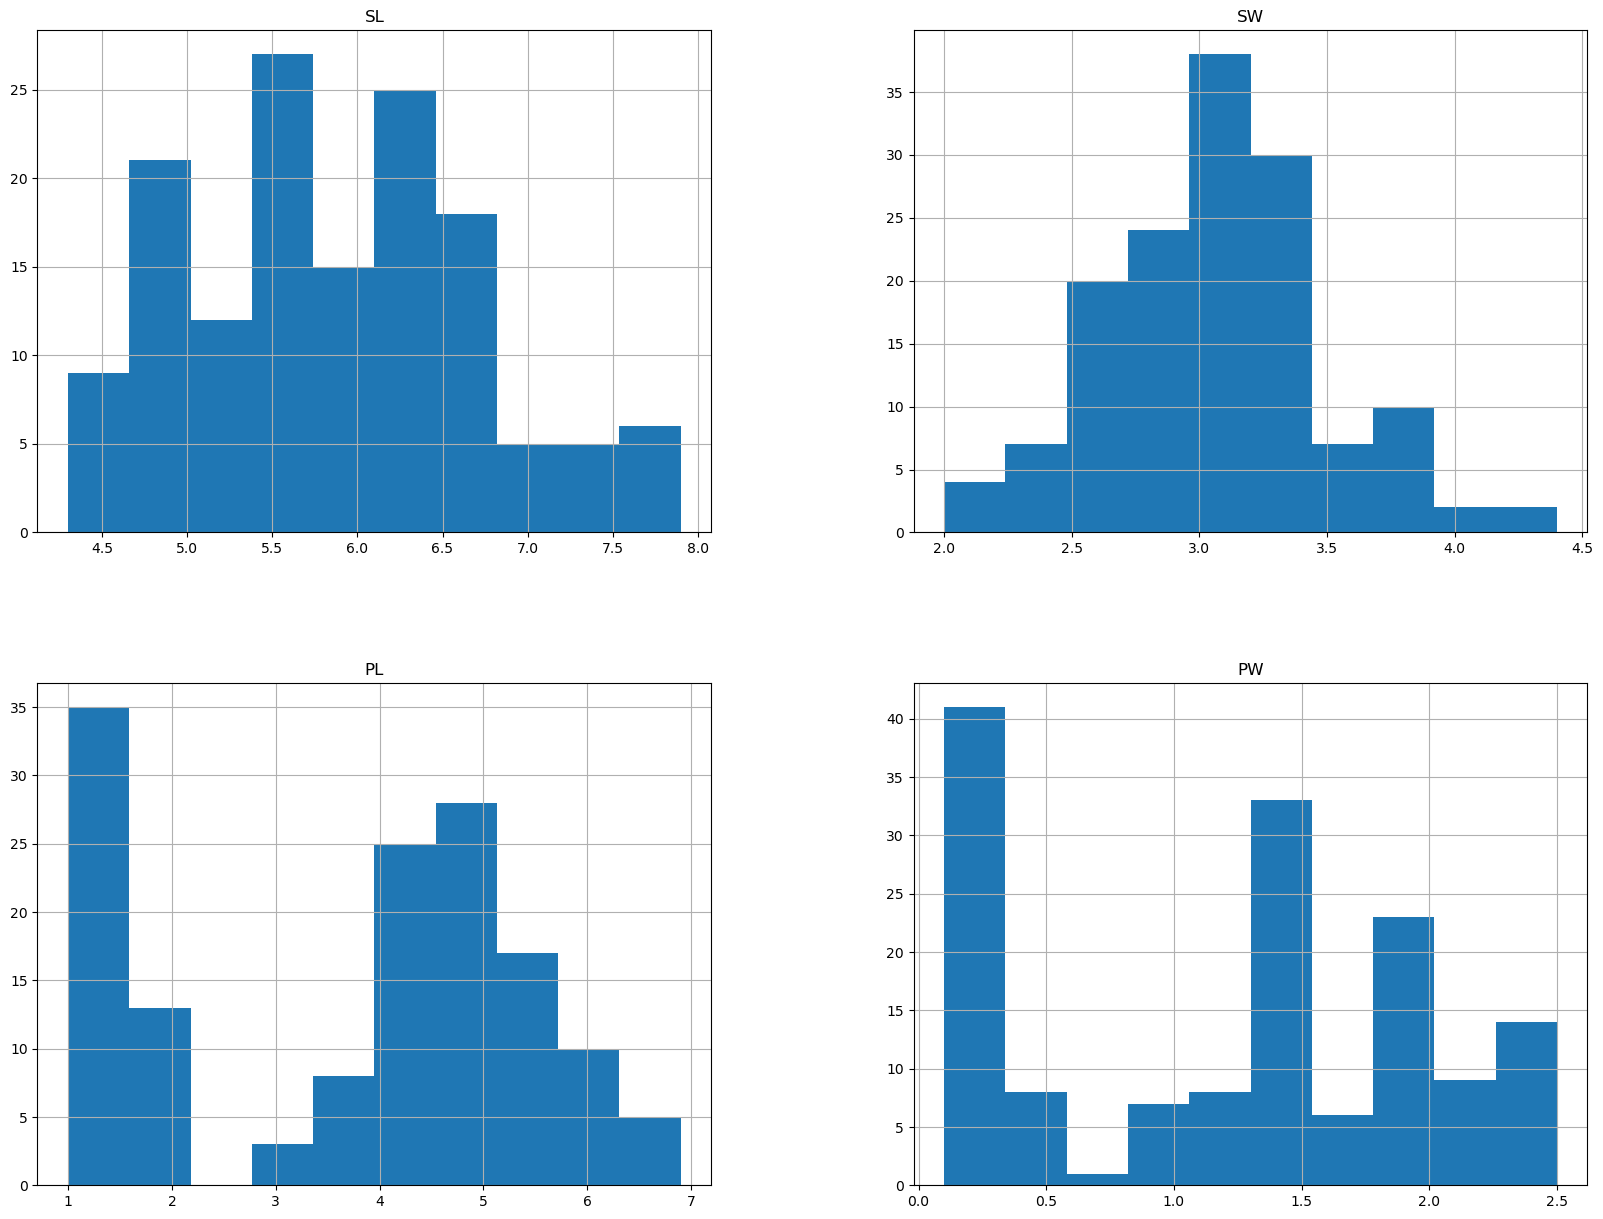

In [11]:
num_data.hist(figsize=(20,15))
plt.show()

From the histogram, it is clear that apart from SW all other data sets are positively skewed.
So we are replacing the missing values with median.

In [12]:
for i in ['SL','SW','PL']:
    data[i].fillna(value=data[i].median(),inplace=True)

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Dependent and independent variable

In [14]:
y=data['Classification']
x=data.drop(['Classification'],axis=1)

# Splitting the data into train test model

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
clf=LogisticRegression()
model=clf.fit(x_train,y_train)


C:\Users\Anagha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
y_pred=model.predict(x_test)

# checking the model accuracy

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [20]:
print(confusion_matrix(y_test,y_pred))

[[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


In [69]:
print('accuracy_score=',accuracy_score(y_test,y_pred))
print('classificaton_report:\n',classification_report(y_test,y_pred))



accuracy_score= 0.9736842105263158
classificaton_report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# Trying to predict by using a random dataset¶

In [21]:
y_pred=model.predict([[5.2,3.2,1.5,0.3]])

C:\Users\Anagha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
print(y_pred)

['Iris-setosa']


# From the given input the model predict that it comes under classfication Iris-setosa. 

# kNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
metric_k=[]
neighbors=np.arange(3,15)

In [73]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)
    


C:\Users\Anagha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anagha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

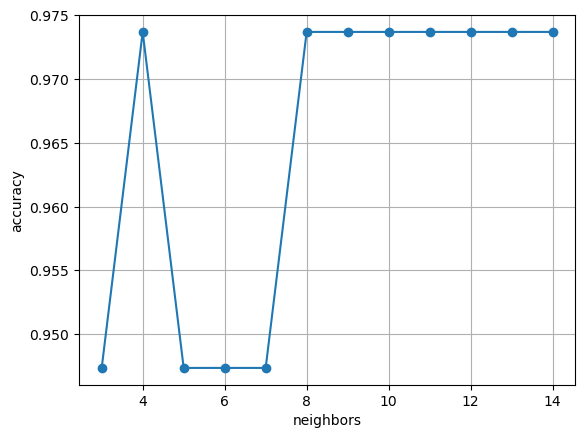

In [74]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.grid()
plt.show()

We can see that accuracy is maximum at k = 4,8,10,12,14. So we can choose the minimum number of neighbors from this to predict. K=4

In [79]:
classifier = KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
metric_k.append(acc)
    

C:\Users\Anagha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [80]:
print(confusion_matrix(y_test,y_pred))

[[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


In [81]:
print('accuracy_score=',accuracy_score(y_test,y_pred))
print('classificaton_report:\n',classification_report(y_test,y_pred))


accuracy_score= 0.9736842105263158
classificaton_report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# SVM

In [24]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')

In [25]:
model=svmclf.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix

In [27]:
print('accuracy=',accuracy_score(y_test,y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))

accuracy= 1.0
confusion matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


RBF

In [28]:
from sklearn.svm import SVC
svmclf=SVC(kernel='rbf')
model=svmclf.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy=',accuracy_score(y_test,y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))

accuracy= 0.9736842105263158
confusion matrix:
 [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


Polynomial

In [29]:
from sklearn.svm import SVC
svmclf=SVC(kernel='poly')
model=svmclf.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy=',accuracy_score(y_test,y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))

accuracy= 0.9736842105263158
confusion matrix:
 [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


# Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
decclf=DecisionTreeClassifier()
model=decclf.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy=',accuracy_score(y_test,y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))

accuracy= 1.0
confusion matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rdmclf=RandomForestClassifier(n_estimators=50)
model=rdmclf.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy=',accuracy_score(y_test,y_pred))
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))

accuracy= 1.0
confusion matrix:
 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


AS WE CAN SEE HERE RANDOM FOREST,DECISION TREE AND SVM(LINEAR) PROVIDING 100% ACCURACY FOR THE MODEL AND kNN AND LOGISTIC REGRESION HAVE AN ACCURACY OF 0.973.

# Trying to predict by using a random dataset

In [24]:
y_pred=model.predict([[6.1,2.2,5.1,1.0]])

C:\Users\Anagha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [25]:
print(y_pred)

['Iris-versicolor']


# From the given input the model predict that it comes under classfication Iris-versicolor.